In [28]:
import pandas as pd 
import ast 
import matplotlib.pyplot as plt
from collections import defaultdict as dd  

In [4]:
# Data from https://www.kaggle.com/rounakbanik/the-movies-dataset
movies_cols = ['genres', 'id', 'budget', 'original_title', 'production_companies', 'production_countries', 
               'release_date', 'revenue', 'title']
movies_df = pd.read_csv("movies_metadata.csv.zip", usecols=movies_cols).dropna()
credits_df = pd.read_csv("credits.csv.zip")
keywords_df = pd.read_csv("keywords.csv.zip")

In [5]:
movies_df.head()

,budget,genres,id,original_title,production_companies,production_countries,release_date,revenue,title
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,Toy Story
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,Jumanji
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,Grumpier Old Men
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,Waiting to Exhale
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,Father of the Bride Part II,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,Father of the Bride Part II


In [6]:
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [7]:
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [8]:
def resolve_jsons(df, column_name, ):
    i = 0
    for col in df[column_name]:
        new_col = []
        try:
            col = ast.literal_eval(col)
            for c in col:
                new_col.append(c["name"])
            df[column_name].iloc[i] = new_col
        except (ValueError,TypeError):
            pass
        i+=1
    

In [9]:
resolve_jsons(movies_df, 'genres' )
resolve_jsons(movies_df, 'production_companies')
resolve_jsons(movies_df, 'production_countries')
resolve_jsons(keywords_df, 'keywords')
resolve_jsons(credits_df,'cast')

C:\Users\natal\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
#isolated director from crew property and repleced the column 'crew' for 'director'
i = 0
for col in credits_df["crew"]:
    new_col = []
    try:
            col = ast.literal_eval(col)
            for c in col:
                if c["job"] == "Director":
                    new_col.append(c["name"])
            credits_df["crew"].iloc[i] = new_col
    except (ValueError,TypeError):
        pass
    i+=1
credits_df = credits_df.rename(columns={"crew":"director"})

In [11]:
credits_df.head()

,cast,director,id
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],862
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],8844
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],15602
3,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],31357
4,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],11862


In [12]:
#merging credits,movies,keywords df into one table
credits_df = credits_df.merge(keywords_df,how='right',on='id')

In [13]:
credits_df.head()

,cast,director,id,keywords
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],862,"[jealousy, toy, boy, friendship, friends, riva..."
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],8844,"[board game, disappearance, based on children'..."
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],15602,"[fishing, best friend, duringcreditsstinger, o..."
3,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],31357,"[based on novel, interracial relationship, sin..."
4,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],11862,"[baby, midlife crisis, confidence, aging, daug..."


In [14]:
movies_df['id']=movies_df['id'].astype(int).astype("int64")

movies_df = movies_df.merge(credits_df)

In [15]:
# Some columns have values of bad type, for example strings in 'budget'.
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')
movies_df = movies_df.dropna()

In [16]:
movies_df.head(10)

,budget,genres,id,original_title,production_companies,production_countries,release_date,revenue,title,cast,director,keywords
0,30000000,"[Animation, Comedy, Family]",862,Toy Story,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],"[jealousy, toy, boy, friendship, friends, riva..."
1,65000000,"[Adventure, Fantasy, Family]",8844,Jumanji,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],"[board game, disappearance, based on children'..."
2,0,"[Romance, Comedy]",15602,Grumpier Old Men,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],"[fishing, best friend, duringcreditsstinger, o..."
3,16000000,"[Comedy, Drama, Romance]",31357,Waiting to Exhale,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],"[based on novel, interracial relationship, sin..."
4,0,[Comedy],11862,Father of the Bride Part II,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],"[baby, midlife crisis, confidence, aging, daug..."
5,60000000,"[Action, Crime, Drama, Thriller]",949,Heat,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818.0,Heat,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",[Michael Mann],"[robbery, detective, bank, obsession, chase, s..."
6,58000000,"[Comedy, Romance]",11860,Sabrina,"[Paramount Pictures, Scott Rudin Productions, ...","[Germany, United States of America]",1995-12-15,0.0,Sabrina,"[Harrison Ford, Julia Ormond, Greg Kinnear, An...",[Sydney Pollack],"[paris, brother brother relationship, chauffeu..."
7,0,"[Action, Adventure, Drama, Family]",45325,Tom and Huck,[Walt Disney Pictures],[United States of America],1995-12-22,0.0,Tom and Huck,"[Jonathan Taylor Thomas, Brad Renfro, Rachael ...",[Peter Hewitt],[]
8,35000000,"[Action, Adventure, Thriller]",9091,Sudden Death,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],1995-12-22,64350171.0,Sudden Death,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...",[Peter Hyams],"[terrorist, hostage, explosive, vice president]"
9,58000000,"[Adventure, Action, Thriller]",710,GoldenEye,"[United Artists, Eon Productions]","[United Kingdom, United States of America]",1995-11-16,352194034.0,GoldenEye,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,...",[Martin Campbell],"[cuba, falsely accused, secret identity, compu..."


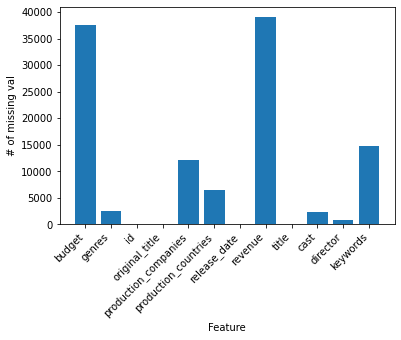

In [26]:
#data statistics 
sum_missing_val = []
for col in movies_df.columns:
    sum = 0
    for x in movies_df[col]:
        if x == [] or x == 0 or x == None:
            sum += 1
    sum_missing_val.append(sum)
    
        
x = movies_df.columns
num_col = len(x)
y = sum_missing_val
plt.bar(x,y)
plt.xlabel('Feature')
plt.ylabel('# of missing val')
plt.xticks(rotation=45, ha="right")
plt.show()
    

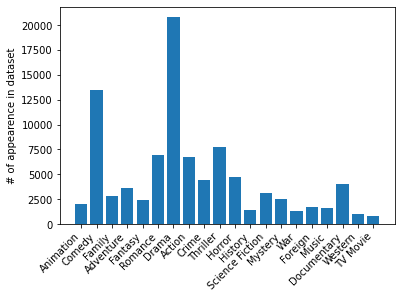

In [36]:
genres = dd(int)
for x in movies_df['genres']:
    for genre in x:
        genres[genre] += 1

genres_names = genres.keys()
num_genres = len(genres_names)
y = genres.values()
plt.bar(genres_names,y)
plt.ylabel('# of appearence in dataset')
plt.xticks(rotation=45, ha="right")
plt.show()

In [56]:
# which genres appear with others the most 

genres = [dd(int) for x in genres_names]
for x in movies_df['genres']:
    for genre1 in x:
        for genre2 in x:
            genres[list(genres_names).index(genre1)][genre2] +=1

for genre in list(genres_names):
    
    most_common_pair_genre = genres[list(genres_names).index(genre)].keys()
    most_common_pair_count = genres[list(genres_names).index(genre)].values()
    most_common_pairs = list(zip(most_common_pair_count,most_common_pair_genre))
    most_common_pairs = sorted(most_common_pairs,reverse=True)
    most_common_pairs = most_common_pairs[1:3]
    print(genre,": ", most_common_pairs)





Animation :  [(878, 'Family'), (564, 'Comedy')]
Comedy :  [(4295, 'Drama'), (3197, 'Romance')]
Family :  [(1205, 'Comedy'), (878, 'Animation')]
Adventure :  [(1775, 'Action'), (1071, 'Drama')]
Fantasy :  [(744, 'Comedy'), (712, 'Drama')]
Romance :  [(4605, 'Drama'), (3197, 'Comedy')]
Drama :  [(4605, 'Romance'), (4295, 'Comedy')]
Action :  [(2395, 'Thriller'), (2368, 'Drama')]
Crime :  [(2581, 'Drama'), (2055, 'Thriller')]
Thriller :  [(3491, 'Drama'), (2395, 'Action')]
Horror :  [(1951, 'Thriller'), (890, 'Science Fiction')]
History :  [(1098, 'Drama'), (346, 'War')]
Science Fiction :  [(1101, 'Action'), (890, 'Horror')]
Mystery :  [(1535, 'Thriller'), (1201, 'Drama')]
War :  [(1006, 'Drama'), (346, 'History')]
Foreign :  [(1009, 'Drama'), (408, 'Comedy')]
Music :  [(645, 'Drama'), (578, 'Comedy')]
Documentary :  [(348, 'Music'), (216, 'Drama')]
Western :  [(371, 'Action'), (277, 'Drama')]
TV Movie :  [(406, 'Drama'), (174, 'Comedy')]
